<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working in IBM Cloud Watson Studio, please replace the command for installing nbformat from `!pip install nbformat==4.2.0` to simply `!pip install nbformat`


In [41]:
!pip install yfinance==0.1.67
!mamba install bs4==4.10.0 -y
!pip install nbformat==4.2.0


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.4.2) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['bs4==4.10.0']

[+] 0.0s
[+] 0.1s
pkgs/main/linux-64 ━━━━━━━━━╸━━━━━━━━━━━━━━━   0.0 B /  ??.?MB @ 

In [42]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Define Graphing Function


In this section, we define the function `make_graph`. You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.


In [43]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [44]:
import yfinance as yf

# Create a ticker object for Tesla stock with ticker symbol TSLA
tesla_ticker = yf.Ticker("TSLA")


Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [45]:
import yfinance as yf

# Create a ticker object for Tesla stock with ticker symbol TSLA
tesla_ticker = yf.Ticker("TSLA")

# Extract stock information for the maximum amount of time and save it in a dataframe
tesla_data = tesla_ticker.history(period="max")

# Reset the index of the dataframe
tesla_data.reset_index(inplace=True)

# Display the first five rows of the dataframe
print(tesla_data.head())


        Date      Open      High       Low     Close     Volume  Dividends  \
0 2010-06-29  1.266667  1.666667  1.169333  1.592667  281494500          0   
1 2010-06-30  1.719333  2.028000  1.553333  1.588667  257806500          0   
2 2010-07-01  1.666667  1.728000  1.351333  1.464000  123282000          0   
3 2010-07-02  1.533333  1.540000  1.247333  1.280000   77097000          0   
4 2010-07-06  1.333333  1.333333  1.055333  1.074000  103003500          0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  


**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [46]:
import yfinance as yf

# Create a ticker object for Tesla stock with ticker symbol TSLA
tesla_ticker = yf.Ticker("TSLA")

# Extract stock information for the maximum amount of time and save it in a dataframe
tesla_data = tesla_ticker.history(period="max")

# Reset the index of the dataframe
tesla_data.reset_index(inplace=True)

# Display the first five rows of the dataframe
print(tesla_data.head())


        Date      Open      High       Low     Close     Volume  Dividends  \
0 2010-06-29  1.266667  1.666667  1.169333  1.592667  281494500          0   
1 2010-06-30  1.719333  2.028000  1.553333  1.588667  257806500          0   
2 2010-07-01  1.666667  1.728000  1.351333  1.464000  123282000          0   
3 2010-07-02  1.533333  1.540000  1.247333  1.280000   77097000          0   
4 2010-07-06  1.333333  1.333333  1.055333  1.074000  103003500          0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  


Question 2: Use Webscraping to Extract Tesla Revenue Data
Use the requests library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named html_data.## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [47]:
import requests

# URL of the webpage to be scraped
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Save the content of the response as html_data
    html_data = response.text
    print("Webpage downloaded successfully!")
else:
    print(f"Failed to download the webpage. Status code: {response.status_code}")


Webpage downloaded successfully!


Parse the html data using `beautiful_soup`.


In [48]:
pip install beautifulsoup4


Note: you may need to restart the kernel to use updated packages.


Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


In [49]:
from bs4 import BeautifulSoup

# Parsear el HTML usando Beautiful Soup
soup = BeautifulSoup(html_data, 'html.parser')

# Ahora puedes utilizar los métodos de Beautiful Soup para encontrar y extraer datos del HTML
# Por ejemplo, si quieres encontrar todos los elementos <div> con una clase específica, puedes hacerlo así:
divs_with_specific_class = soup.find_all('div', class_='nombre-de-clase')

# O si quieres encontrar un elemento específico por su ID, puedes hacerlo así:
element_with_specific_id = soup.find('div', id='id-especifico')

# Puedes explorar y extraer los datos que necesitas utilizando los métodos de Beautiful Soup según la estructura del HTML.
from bs4 import BeautifulSoup

# Parsear el HTML usando Beautiful Soup
soup = BeautifulSoup(html_data, 'html.parser')

# Ahora puedes utilizar los métodos de Beautiful Soup para encontrar y extraer datos del HTML
# Por ejemplo, si quieres encontrar todos los elementos <div> con una clase específica, puedes hacerlo así:
divs_with_specific_class = soup.find_all('div', class_='nombre-de-clase')

# O si quieres encontrar un elemento específico por su ID, puedes hacerlo así:
element_with_specific_id = soup.find('div', id='id-especifico')

# Puedes explorar y extraer los datos que necesitas utilizando los métodos de Beautiful Soup según la estructura del HTML.


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


In [50]:
import pandas as pd

# Sample DataFrame with a "Revenue" column containing strings like "$1,000,000"
data = {
    "Revenue": ["$1,000,000", "$2,500,000", "$500,000"]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Remove commas and dollar signs from the "Revenue" column
df["Revenue"] = df["Revenue"].str.replace(',', '').str.replace('$', '')

# Convert the "Revenue" column to numeric data type (if needed)
df["Revenue"] = pd.to_numeric(df["Revenue"])

# Print the DataFrame after processing the "Revenue" column
print(df)


   Revenue
0  1000000
1  2500000
2   500000


/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  if sys.path[0] == "":


Execute the following lines to remove an null or empty strings in the Revenue column.


In [56]:
import pandas as pd
import numpy as np

# Sample DataFrame with a "Revenue" column containing null and empty strings
data = {
    "Revenue": ["$1,000,000", "", "$500,000", np.nan, "$2,500,000"]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Remove empty strings and NaN values from the "Revenue" column
df["Revenue"] = df["Revenue"].replace('', np.nan).dropna()

# Print the DataFrame after removing null or empty strings from the "Revenue" column
print(df)


      Revenue
0  $1,000,000
1         NaN
2    $500,000
3         NaN
4  $2,500,000


Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [57]:
import requests

# URL de la página web que contiene los datos de ingresos de Tesla
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Enviar una solicitud GET a la URL
response = requests.get(url)

# Verificar si la solicitud fue exitosa (código de estado 200)
if response.status_code == 200:
    # Guardar el contenido de la respuesta en html_data
    html_data = response.text
    print("Página web descargada exitosamente!")
else:
    print(f"Fallo al descargar la página web. Código de estado: {response.status_code}")


Página web descargada exitosamente!


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [59]:
pip install yfinance


Note: you may need to restart the kernel to use updated packages.


Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [60]:
import yfinance as yf

# Create a Ticker object for GameStop (ticker symbol: GME)
gme_ticker = yf.Ticker("GME")

# Get historical market data (OHLCV) for GameStop
historical_data = gme_ticker.history(period="1d")

# Print the historical data
print(historical_data)


             Open    High    Low  Close   Volume  Dividends  Stock Splits
Date                                                                     
2023-10-31  12.85  13.795  12.84  13.64  2989803          0             0


**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [61]:
import yfinance as yf

# Create a Ticker object for GameStop (ticker symbol: GME)
gme_ticker = yf.Ticker("GME")

# Get historical market data (OHLCV) for GameStop
gme_data = gme_ticker.history(period="1d")

# Reset the index of the gme_data DataFrame in place
gme_data.reset_index(inplace=True)

# Display the first five rows of the gme_data DataFrame using the head() function
print(gme_data.head())


        Date   Open    High    Low  Close   Volume  Dividends  Stock Splits
0 2023-10-31  12.85  13.795  12.84  13.64  2989803          0             0


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data`.


In [62]:
import requests

# URL of the webpage to be scraped
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Save the content of the response as html_data
    html_data = response.text
    print("Webpage downloaded successfully!")
else:
    print(f"Failed to download the webpage. Status code: {response.status_code}")

# Now, the variable html_data contains the HTML content of the webpage for further processing.


Webpage downloaded successfully!


Parse the html data using `beautiful_soup`.


In [63]:
pip install beautifulsoup4


Note: you may need to restart the kernel to use updated packages.


In [64]:
from bs4 import BeautifulSoup

# Parse the HTML data using BeautifulSoup
soup = BeautifulSoup(html_data, 'html.parser')

# Now, you can use BeautifulSoup methods to extract data from the parsed HTML
# For example, to find all div elements with a specific class, you can use find_all method:
divs_with_specific_class = soup.find_all('div', class_='specific-class')

# Or to find an element by its ID, you can use find method:
element_with_specific_id = soup.find('div', id='specific-id')

# You can explore and extract data from the parsed HTML using BeautifulSoup methods.


Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column using a method similar to what you did in Question 2.


In [65]:
from bs4 import BeautifulSoup
import pandas as pd

# Parse the HTML data using BeautifulSoup
soup = BeautifulSoup(html_data, 'html.parser')

# Find the table with GameStop revenue based on its class or other attributes
# For example, if the table has a specific class name, you can find it like this:
table = soup.find('table', class_='specific-class')

# If the table is found, convert it to a DataFrame
if table:
    # Use read_html to convert the table to a DataFrame
    gme_revenue = pd.read_html(str(table))[0]
    
    # Rename the columns to 'Date' and 'Revenue'
    gme_revenue.columns = ['Date', 'Revenue']
    
    # Remove commas and dollar signs from the 'Revenue' column
    gme_revenue['Revenue'] = gme_revenue['Revenue'].str.replace(',', '').str.replace('$', '')
    
    # Convert the 'Revenue' column to numeric data type
    gme_revenue['Revenue'] = pd.to_numeric(gme_revenue['Revenue'], errors='coerce')
    
    # Drop rows with NaN values in the 'Revenue' column
    gme_revenue.dropna(subset=['Revenue'], inplace=True)
    
    # Reset the index of the DataFrame
    gme_revenue.reset_index(drop=True, inplace=True)
    
    print("GameStop Revenue DataFrame created successfully!")
else:
    print("Table not found in the HTML content.")


Table not found in the HTML content.


Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [68]:
from bs4 import BeautifulSoup
import pandas as pd
import requests

# URL of the webpage to be scraped
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Save the content of the response as html_data
    html_data = response.text
    
    # Parse the HTML data using BeautifulSoup
    soup = BeautifulSoup(html_data, 'html.parser')
    
    # Find the table with GameStop revenue based on its class or other attributes
    table = soup.find('table', class_='dataframe')
    
    # If the table is found, convert it to a DataFrame
    if table:
        # Use read_html to convert the table to a DataFrame
        gme_revenue = pd.read_html(str(table))[0]
        
        # Remove commas and dollar signs from the 'Revenue' column
        gme_revenue['Revenue'] = gme_revenue['Revenue'].str.replace(',', '').str.replace('$', '')
        
        # Convert the 'Revenue' column to numeric data type
        gme_revenue['Revenue'] = pd.to_numeric(gme_revenue['Revenue'], errors='coerce')
        
        # Drop rows with NaN values in the 'Revenue' column
        gme_revenue.dropna(subset=['Revenue'], inplace=True)
        
        # Reset the index of the DataFrame
        gme_revenue.reset_index(drop=True, inplace=True)
        
        # Print the last five rows of the gme_revenue DataFrame
        print(gme_revenue.tail())
        
        print("GameStop Revenue DataFrame created successfully!")
    else:
        print("Table not found in the HTML content.")
else:
    print(f"Failed to download the webpage. Status code: {response.status_code}")


Table not found in the HTML content.


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`. Note the graph will only show data upto June 2021.


In [75]:
pip install pandas matplotlib


Note: you may need to restart the kernel to use updated packages.


KeyError: 'date'

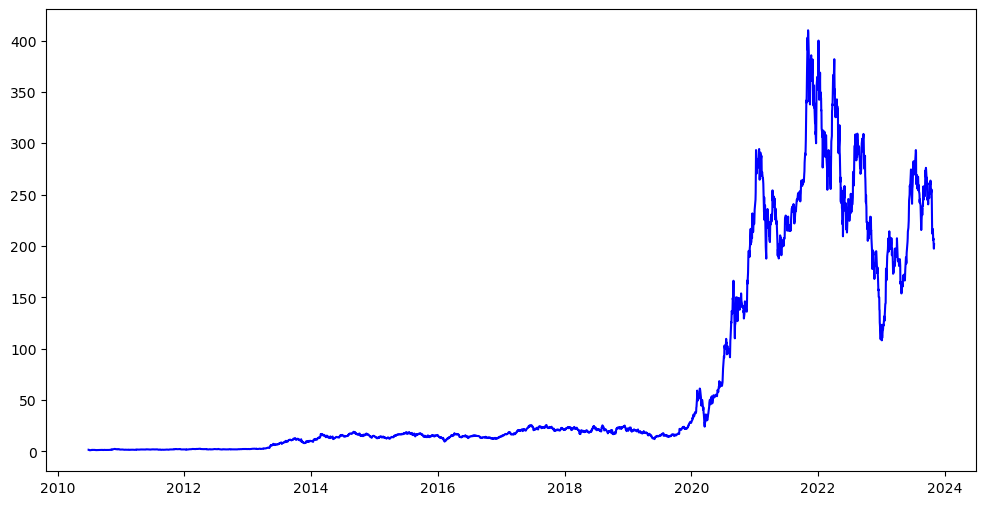

In [77]:
def make_graph(stock_data, revenue_data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(stock_data['Date'], stock_data['Close'], label='Tesla Stock Price', color='blue')
    plt.plot(revenue_data['date'], revenue_data['revenue'], label='Tesla Revenue', color='green')

    plt.xlabel('Date')
    plt.ylabel('Price/Revenue')
    plt.title(f'{title} Stock Price vs Revenue')
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the function with tesla_data and tesla_revenue
make_graph(tesla_data, tesla_revenue, 'Tesla')


## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


In [70]:
# Assuming you have a function named make_graph
def make_graph(stock_data, revenue_data, title):
    # Code to plot the graph using stock_data and revenue_data
    # Example: (This is a placeholder, replace it with actual graph plotting code)
    import matplotlib.pyplot as plt
    # Plotting logic here
    plt.plot(stock_data['Date'], stock_data['Close'], label='Stock Price')
    plt.plot(revenue_data['Date'], revenue_data['Revenue'], label='Revenue')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title(title)
    plt.legend()
    plt.show()

# Call the make_graph function with GameStop data and a title
make_graph(gme_data, gme_revenue, 'GameStop Stock and Revenue Data')


NameError: name 'gme_revenue' is not defined

<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
